In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random

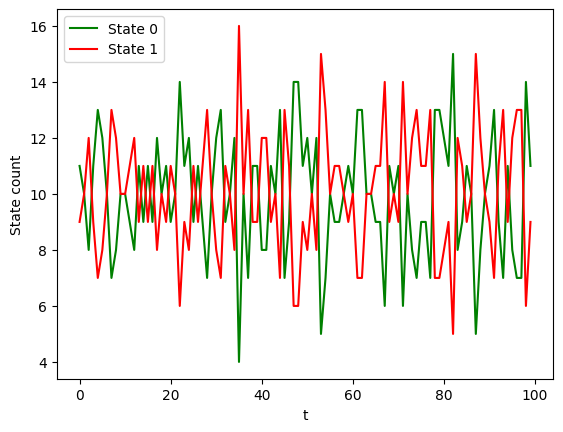

In [65]:
n = 20 #number of points created
iterations = 100
point_list = []
states = []
for i in range(n):
    x = random.uniform(-10,10)
    y = random.uniform(-10,10)
    w = random.choice([0,1]) #state
    point_list.append([x,y])
    states.append(w)

state_zero = []
state_one = []
epsilon = 0.9 #Threshold

def update(point_list, states):
    cont = [] #Contributions
    for k in range(n):
        for l in range(n): 
            if l!=k: # Want to iterate over all numbers but the one I'm considering
                d = np.sqrt(((point_list[k])[0] - (point_list[l])[0])**2 + ((point_list[k])[1] - (point_list[l])[1])**2) # Distance between the points
                delta_w = abs(states[l] - states[k]) #State difference
                val = (1/d) * delta_w
                cont.append(val)
    return cont
cont = update(point_list,states)

for t in range(iterations):
    ones = 0 #Initialize state count
    zeros = 0 
    for i in range(len(states)):       
        # Applying sigmoid
        if 1/(1 + np.e**(-sum(cont[n*(i):n*(i+1)]))) > epsilon: #Want to go within n and n contributions
            states[i] = abs(states[i] - 1) #Switch state
        else:
            states[i] = random.choice([0,1]) # If under threshold, state assignment random
        if states[i] == 1:
            ones += 1
        if states[i] == 0:
            zeros += 1
    state_zero.append(zeros) #Count states per iteration
    state_one.append(ones)
        
fig, ax = plt.subplots()
ax.plot(range(iterations),state_zero, label="State 0", color = "g")
ax.plot(range(iterations),state_one, label="State 1", color = "r")
ax.set_xlabel("t")
ax.set_ylabel("State count")
plt.legend()
plt.show()



Lets now consider the following. Lets have a net with $N$ genes, each gene having a binary state evaluation (0,1). Furthermore, each gene over each iteration receives $x$ inputs from other genes, and updates its state, given a certain truth table. Lets consider such update rule to fall under an AND gate, such that
$$
x_{1}\quad x_{2}\quad y $$
$$0 \quad 0 \quad 0 $$
$$0 \quad 1 \quad 0 $$
$$1 \quad 1 \quad 0 $$
$$ 1 \quad 1 \quad 1 $$

An additional remark. If only with one gate, even if universal like AND, I believe it's very hard for state to come back to an initial state. As such, we'll work with every truth table, but draw an integer randomly, such that we get a truth table assigned. (Tried it, and apparently with only 4 Boolean functions (AND gate), it either would be impossible (falling into a collection of states that never converge again to the initial state), or would essentially be very slow).

A state, the state of the net better said, is then caracterized by a sequence of binary values reflecting each gene's state. As such, given the binary classification, the state space is comprised by $2^{N}$ states.

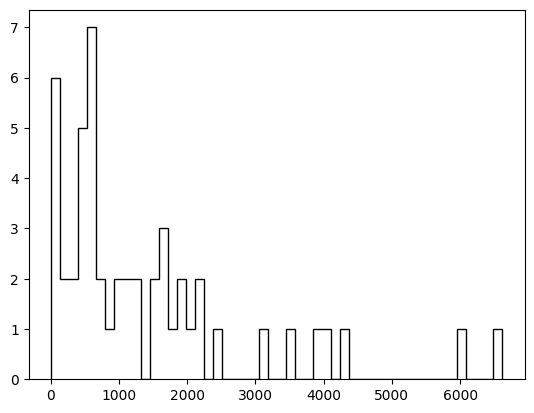

In [66]:
N = 10 #Number of genes
x = 2 #Number of inputs to each gene
states = [] 
iter = 50 #How many tests

for n in range(N):
    state = random.choice([0,1])
    states.append(state)

initial_state = states.copy() #Initial state
initial_state[-1] = abs(initial_state[-1] - 1) #Small mutation, switch, just to not have cycle length 0
all_cycle_lengths = []
for cycle in range(iter):
    cycle_length = 0
    while states != initial_state:
        for gene in range(N):
            x1 = states[random.randint(0,N-1)]
            x2 = states[random.randint(0,N-1)]
            boolean_table = random.randint(1,5)
            if boolean_table == 1: #AND gate
                if (x1 and x2) == 1:
                    states[gene] = 1
                else:
                    states[gene] = 0
            if boolean_table == 2: #OR gate
                if (x1 and x2) == 0:
                    states[gene] = 0
                else:
                    states[gene] = 1
            if boolean_table == 3: #XOR gate
                if (x1 == x2):
                    states[gene] = 0
                else:
                    states[gene] = 1
            if boolean_table == 4: #Tautology
                states[gene] = 1
            if boolean_table == 5: #Contradiction
                states[gene] = 0
        cycle_length += 1
    initial_state[-1] = abs(initial_state[-1] - 1)
    all_cycle_lengths.append(cycle_length)
plt.hist(all_cycle_lengths, histtype = "step", color = "black", bins = 50)
plt.show()

In [67]:
# Very quickly lets just see the mean and std

mean = np.mean(all_cycle_lengths)
std = np.std(all_cycle_lengths)
print(f"Mean {mean} and std {std}") # As we can see there are some cycles that take very long to come back to initial state
# And this with only 10 genes and 2 inputs applied to each gene, allowing 16 Boolean Functions, taken on a random basis

Mean 1415.38 and std 1468.4864165527715
